In [ ]:
conda install pandas

In [7]:
import pandas as pd

print(pd.__version__)

1.2.4


In [17]:

# Load the data into dataframes

movies_df = pd.read_csv('C:/Users/USER/Desktop/Untitled Export/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('C:/Users/USER/Desktop/Untitled Export/ml-latest-small/ratings.csv')

In [18]:
# Check the first few rows of each dataframe
print(movies_df.head())
print(ratings_df.head())

# Check the number of rows and columns in each dataframe
print(movies_df.shape)
print(ratings_df.shape)

# Check the data types and missing values in each dataframe
print(movies_df.info())
print(ratings_df.info())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
(9742, 3)
(100836, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------ 

In [19]:
# Drop unnecessary columns from the movies dataframe
#movies_df = movies_df.drop(columns=['genres'])

# Merge the movies and ratings dataframes
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

# Convert the timestamp to a readable date format
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')


In [20]:
print(movies_df)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [38]:
# Find the top-rated movies
top_rated_movies = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print(top_rated_movies)

# Find the most rated movies
most_rated_movies = merged_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print(most_rated_movies)

# Find the average rating by genre
avg_rating_by_genre = merged_df.groupby('genres')['rating'].mean().head(10).sort_values(ascending=False)
print(avg_rating_by_genre)


title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)     

In [22]:
!pip install matplotlib

In [23]:
!pip install seaborn

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

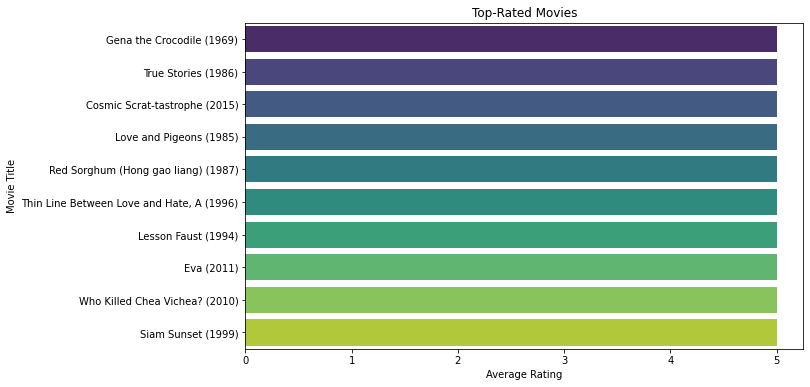

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies.values, y=top_rated_movies.index, palette='viridis')
plt.title('Top-Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

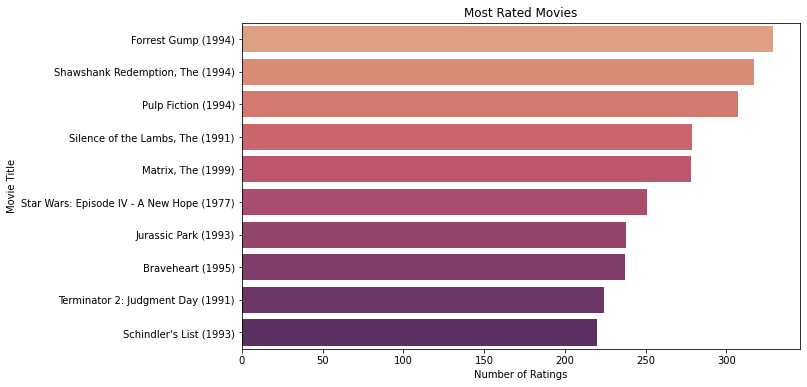

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=most_rated_movies.values, y=most_rated_movies.index, palette='flare')
plt.title('Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

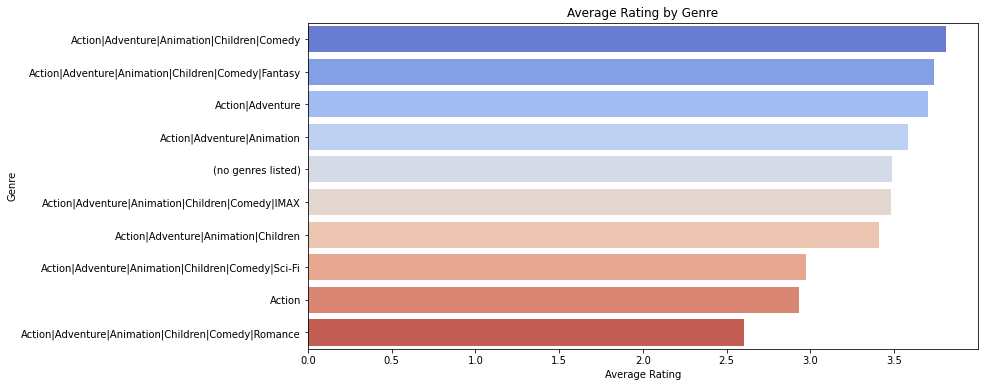

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette='coolwarm')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()